Lattice boltzmann method for fluid dynamics
============================================
f depends on time, position r, and velocity c
at each timestep, f is propagated : 
f(r + cdt, c, t + dt) = f(r, c, t)


In [9]:
import numpy as np
import matplotlib.pyplot as plt
W, L = 40, 40 # width and length of the grid
velocity_set = np.array([[0, 0], [0, 1], [1, 0], [0, -1], [-1, 0],
                            [1, 1], [-1, -1], [1, -1], [-1, 1]])

# velocity and density are 2D arrays
#velocity = np.zeros((L, W))
#density = np.zeros((L, W))


def init_pdf(): # uniform distribution
    pdf = np.zeros((len(velocity_set), L, W))
    for i in range(len(velocity_set)):
        pdf[i] = np.random.uniform(0, 1, (L, W))
    pdf /= np.sum(pdf, axis=0)
    return pdf


def calc_density(pdf):
    density = np.sum(pdf, axis=0)
    return density

def calc_velocity(pdf):
    velocity = np.zeros((L, W, 2))
    # loop through all positions
    for i in range(L):
        for j in range(W):
            # loop through all velocities
            for k in range(len(velocity_set)):
                velocity[i, j, 0] += pdf[k, i, j] * velocity_set[k, 0]
                velocity[i, j, 1] += pdf[k, i, j] * velocity_set[k, 1]
            velocity[i, j, 0] /= calc_density(pdf)[i, j]
            velocity[i, j, 1] /= calc_density(pdf)[i, j]
    return velocity



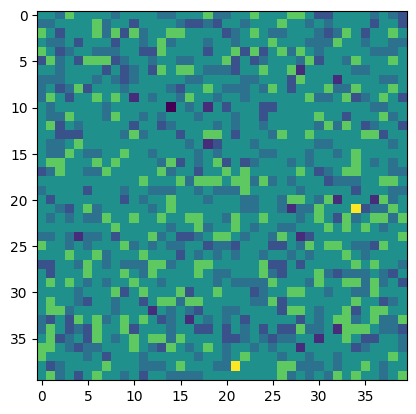

(40, 40, 2)


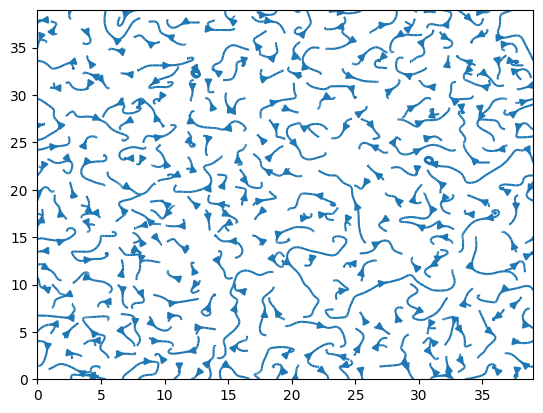

In [10]:
# initialize the pdf at random 

# visualize the pdf
def plot_pdf(pdf):
    plt.figure()
    plt.imshow(calc_density(pdf))
    plt.show()

def plot_velocity(pdf):
    plt.figure()
    velocity = calc_velocity(pdf)
    print(velocity.shape)
    plt.streamplot(np.arange(W), np.arange(L), velocity[:, :, 0], velocity[:, :, 1])
    plt.show()
    

pdf = init_pdf()
plot_pdf(pdf)
plot_velocity(pdf)


In [21]:
def streaming(pdf):
    """ Streaming step """
    pdf_t1 = np.zeros_like(pdf)
    # use np.roll to shift the pdf
    for i in range(len(velocity_set)):
        pdf_t1[i] = np.roll(pdf[i], velocity_set[i, 0], axis=0)
        pdf_t1[i] = np.roll(pdf_t1[i], velocity_set[i, 1], axis=1)
    # check if mass is conserved
    assert np.allclose(np.sum(pdf), np.sum(pdf_t1))
    return pdf_t1


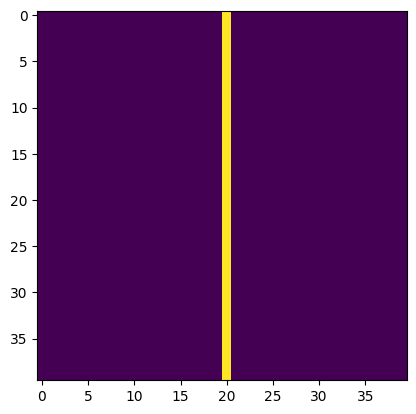

In [25]:
# initialize pdf as a uniform distribution in the x axis    
pdf = np.zeros((len(velocity_set), L, W))
pdf[:, :, W//2] = 1 / len(velocity_set)
plot_pdf(pdf)

/tmp/ipykernel_9805/3156977531.py:33: RuntimeWarning: invalid value encountered in double_scalars
  velocity[i, j, 0] /= calc_density(pdf)[i, j]
/tmp/ipykernel_9805/3156977531.py:34: RuntimeWarning: invalid value encountered in double_scalars
  velocity[i, j, 1] /= calc_density(pdf)[i, j]


(40, 40, 2)


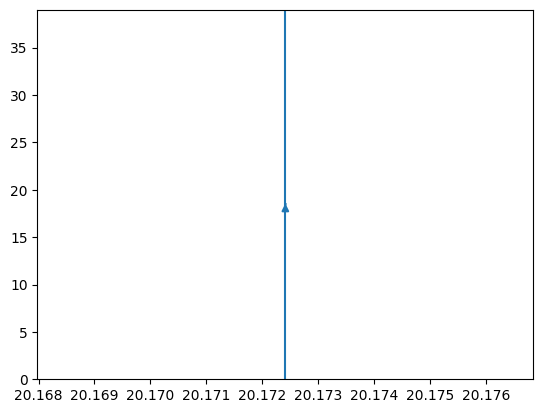

(40, 40, 2)


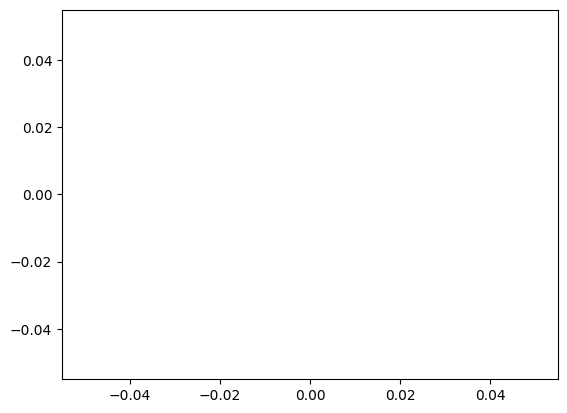

(40, 40, 2)


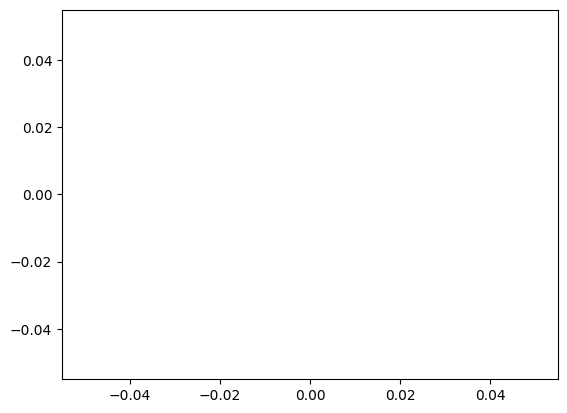

In [23]:
# plot 10 time steps using streamplot
for i in range(3):
    pdf = streaming(pdf)
    plot_velocity(pdf)

    

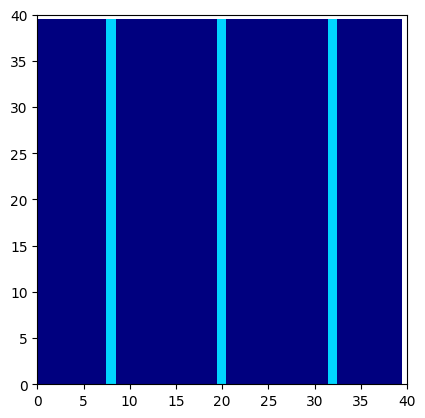

In [26]:
# display an animation of the pdf using the animation module of matplotlib
from matplotlib import animation
from IPython.display import HTML
#pdf = init_pdf()
fig = plt.figure()
ax = plt.axes(xlim=(0, W), ylim=(0, L))
im = ax.imshow(calc_density(pdf), cmap='jet')

def animate(i, plot = "density"):
    global pdf
    pdf = streaming(pdf)
    if plot == "density":
        im.set_array(calc_density(pdf))
    if plot == "velocity":
        velocity = calc_velocity(pdf)
        im.set_array(velocity[:, :, 0])
    return im,

anim = animation.FuncAnimation(fig, animate, frames=25, interval=200, blit=True)
HTML(anim.to_html5_video())
